In [65]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

In [66]:
# Function to load images from directories
def load_images(image_dir):
    images = []
    for model_index in range(1, 11):  # Assuming there are 10 models
        model_dir = os.path.join(image_dir, f'model_{model_index}')
        for image_name in os.listdir(model_dir):
            if image_name.endswith('.png'):
                image_path = os.path.join(model_dir, image_name)
                img = load_img(image_path, color_mode='grayscale')
                img_array = img_to_array(img)
                images.append(img_array)
    return images


Number of images loaded: 3000


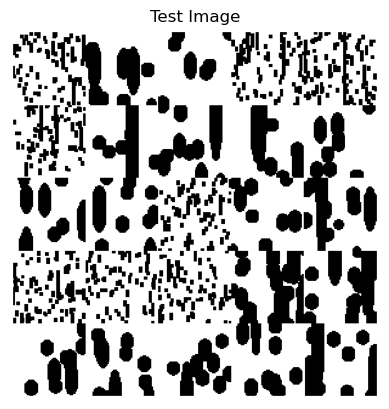

In [67]:

# Directory where images are stored
image_dir = '.'  # Assuming the images are in the same directory as the notebook

# Load images
images = load_images(image_dir)

# Display the number of images loaded
print('Number of images loaded:', len(images))

# Display an example image
if images:
    plt.imshow(images[400].squeeze(), cmap='gray')
    plt.title('Test Image')
    plt.axis('off')
    plt.show()
else:
    print('No images loaded.')



In [68]:
# Define property values for each model
property_values = [47.3433801117506, 34.0618097201366, 21.6198243167674, 15.4888092876998, 59.7228255701155, 72.1980620269284, 37.106938401845, 29.7092474453809, 10.6683756913849, 45.8618035849548]  # replace these with actual values

# Create labels for the images
labels = []
num_images_per_model = 300  # Assuming each model has 300 images
for property_value in property_values:
    labels.extend([property_value] * num_images_per_model)

labels = np.array(labels)

# Convert images to numpy array
images = np.array(images)


In [69]:

# Preprocess images
def preprocess_images(images):
    images = images / 255.0  # Normalize to [0, 1]
    return images

# Preprocess the images
images = preprocess_images(images)

# Create a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((images, labels))

# Shuffle and split the dataset
dataset = dataset.shuffle(buffer_size=len(images))

In [70]:
train_size = int(0.9 * len(images))
val_size = int(0.1 * len(images))

train_val_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

In [71]:
len(train_val_dataset)

2700

In [72]:
len(images)

3000

In [73]:
train_val_dataset= train_val_dataset.shuffle(len(train_val_dataset))

In [74]:
train_dataset= train_val_dataset.take(int(.9*len(train_val_dataset)))
val_dataset = train_val_dataset.skip(int(.9*len(train_val_dataset)))

In [75]:
len(train_dataset)

2430

In [76]:
len(val_dataset)

270

In [77]:
len(test_dataset)

300

In [78]:
type(train_dataset)

tensorflow.python.data.ops.take_op._TakeDataset

In [79]:
BATCH_SIZE = 64

train_data = train_dataset.batch(BATCH_SIZE)
val_data = val_dataset.batch(BATCH_SIZE)
test_data = test_dataset.batch(BATCH_SIZE)

In [80]:
type(train_data)

tensorflow.python.data.ops.batch_op._BatchDataset

In [81]:
# Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (7, 7), activation='relu', input_shape=(592, 592, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Single neuron for regression output
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
 model.compile(optimizer='adam', loss= 'MSE', metrics=['mean_absolute_error'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [83]:
model.fit(
    train_data,
    epochs= 20,
    callbacks= [early_stopping],
    validation_data= val_data,
    verbose= 2
)

Epoch 1/20
38/38 - 804s - 21s/step - loss: 22185.2305 - mean_absolute_error: 42.3910 - val_loss: 77.0115 - val_mean_absolute_error: 7.0931
Epoch 2/20
38/38 - 706s - 19s/step - loss: 31.2338 - mean_absolute_error: 4.3309 - val_loss: 8.6806 - val_mean_absolute_error: 2.3853
Epoch 3/20
38/38 - 997s - 26s/step - loss: 5.7815 - mean_absolute_error: 1.8242 - val_loss: 2.2660 - val_mean_absolute_error: 1.1268
Epoch 4/20
38/38 - 880s - 23s/step - loss: 1.9790 - mean_absolute_error: 1.0254 - val_loss: 0.8773 - val_mean_absolute_error: 0.6595
Epoch 5/20
38/38 - 778s - 20s/step - loss: 1.1672 - mean_absolute_error: 0.7340 - val_loss: 0.5502 - val_mean_absolute_error: 0.5828
Epoch 6/20
38/38 - 763s - 20s/step - loss: 0.7117 - mean_absolute_error: 0.5634 - val_loss: 0.8400 - val_mean_absolute_error: 0.6048
Epoch 7/20
38/38 - 752s - 20s/step - loss: 0.5730 - mean_absolute_error: 0.5200 - val_loss: 0.5590 - val_mean_absolute_error: 0.5824


In [146]:
# Evaluate the model
test_loss, test_mae = model.evaluate(test_data)
print(f'Test MAE: {test_mae}')

# Predict
predictions = model.predict(test_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - loss: 0.8252 - mean_absolute_error: 0.6668
Test MAE: 0.6402195692062378
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


In [105]:
for img, lab in test_data.take(1):
    images_test= img.numpy()
    labels_test= lab.numpy()

2024-07-12 12:59:34.894465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [153]:
images_test.shape

(64, 592, 592, 1)

In [155]:
labels_test.shape

(64,)

In [157]:
images_plot= np.reshape(images_test, (64,592,592))

In [159]:
images_plot.shape

(64, 592, 592)

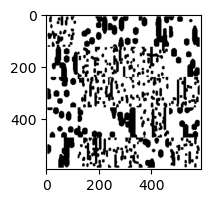

Label= 37.106938401845


In [167]:
i=55
plt.figure(figsize=(2,2))
plt.axis= ('off')
plt.imshow(images_plot[i-1], cmap="gray", aspect='auto')
plt.show()
print('Label=',labels_test[i-1])

In [169]:
prediction_test= model.predict(images_test[i-1:i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [171]:
prediction_test

array([[36.9864]], dtype=float32)